In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

%matplotlib inline

### Desafio

Identifique cada bola contida na imagem abaixo, utilizando o canal H da imagem no sistema de cores HSV. Crie três novas imagens (pretas) contendo cada uma das bolas (em branco), separadamente. Em seguida, desenvolva um algoritmo para descobrir o centro e o raio do círculo que corresponde a cada bola.

Por fim, desenhe uma circunferência de raio igual ao da bola (e com espessura de 20 px) para representar a posição das bolas em uma outra imagem.

As cores das bolas, em RGB, são:
- Azul: (188, 211, 225)
- Amarela: (237,210,77)
- Rosa: (205, 113, 160)

**Exemplo**

![Exemplo de solução](images/desafio-solucao.png)

## Transformações Geométricas
---

## Realce de Imagens
---

#### Lendo a imagem

In [2]:
img = cv2.imread('images/balls.png', cv2.IMREAD_COLOR)

In [3]:
# BGR TO RGB
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

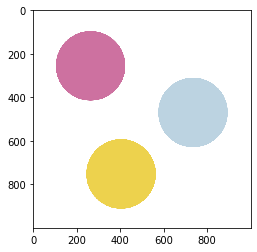

In [4]:
# PREVIEW IMAGE
plt.imshow(img)

#### RGB TO HSV

In [5]:
img = cv2.cvtColor(img, cv2.COLOR_RGB2HSV)
H = img[:,:,0]

#### Transformando em RGB para HSV e retornando o valor de H

In [6]:
def h_from_rgb(R,G,B):
    cor = np.array([[[R, G, B]]], np.uint8)
    cor = cv2.cvtColor(cor, cv2.COLOR_RGB2HSV)
    return cor[0,0,0]

In [7]:
h_azul = h_from_rgb(188, 211, 225)
h_amarelo = h_from_rgb(237,210,77)
h_rosa = h_from_rgb(205, 113, 160)

#### Criando três novas imagens (pretas) contendo cada uma das bolas (em branco), separadamente

In [8]:
def create_img_black():
    return np.zeros((img.shape[:2]), np.uint8)

In [9]:
img_azul = create_img_black()
img_amarelo = create_img_black()
img_rosa = create_img_black()

In [10]:
def white_circle(img,color, H,title):
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            if H[i,j] == color:
                img[i,j] = 255
    plt.imshow(img, cmap = 'gray')
    plt.title(title)

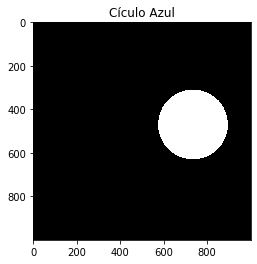

In [11]:
white_circle(img_azul, h_azul, H, 'Cículo Azul')

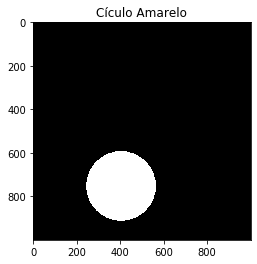

In [12]:
white_circle(img_amarelo, h_amarelo, H, 'Cículo Amarelo')

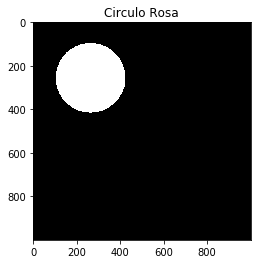

In [13]:
white_circle(img_rosa, h_rosa, H, 'Circulo Rosa')

In [14]:
def center_raio_circle(img):
    lista_x = []
    lista_y = []
    for i in range (img.shape[0]):
        for j in range(img.shape[1]):
            if img[i,j] > 0:
                lista_y.append((i))
                lista_x.append((j))
    x_min = np.min(lista_x)
    y_min = np.min(lista_y)
    x_max = np.max(lista_x)
    y_max = np.max(lista_y)
    raio = (x_max - x_min) / 2
    y_centro = y_min + raio
    x_centro = x_min + raio
    return (int(raio), int(x_centro), int(y_centro))
    

In [15]:
raio_r, x_centro_r, y_centro_r = center_raio_circle(img_rosa)
raio_am, x_centro_am, y_centro_am = center_raio_circle(img_amarelo)
raio_az, x_centro_az, y_centro_az= center_raio_circle(img_azul)

### Final 

In [16]:
img_final = np.zeros((img.shape), np.uint8)

Text(0.5, 1.0, 'Resposta Final')

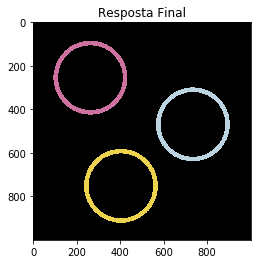

In [17]:
cv2.circle(img_final, center = (x_centro_r,y_centro_r), radius = raio_r, color = (205, 113, 160),  thickness = 20)
cv2.circle(img_final, center = (x_centro_am,y_centro_am), radius = raio_am, color = (237,210,77),  thickness = 20)
cv2.circle(img_final, center = (x_centro_az,y_centro_az), radius = raio_az, color = (188, 211, 225),  thickness = 20)

plt.imshow(img_final)
plt.title('Resposta Final')